In [103]:
import pandas as pd
import numpy as np

In [104]:
df=pd.read_csv('/content/drive/MyDrive/Data Analysis Projects For Resume/Smart Retention: Predicting Churn and Profiling Customers with ML & BI/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




```
📊 Column Name Explanations
Column Name	      Description
customerID	->Unique ID for each customer
gender	->Customer’s gender: Male or Female
SeniorCitizen	->1 = Yes, 0 = No — Whether the customer is a senior citizen
Partner->	Whether the customer has a partner: Yes/No
Dependents->	Whether the customer has dependents (children, family): Yes/No
tenure ->	Number of months the customer has stayed with the company
PhoneService	->Whether the customer has phone service: Yes/No
MultipleLines	->Whether the customer has multiple phone lines: Yes/No/No phone service
InternetService	->Type of internet service: DSL, Fiber optic, No
OnlineSecurity	->Whether the customer has online security add-on
OnlineBackup	->Whether the customer has online backup service
DeviceProtection	->Whether the customer has device protection
TechSupport	->Whether the customer has tech support
StreamingTV	->Whether the customer has streaming TV service
StreamingMovies	->Whether the customer has streaming movies service
Contract	->Type of contract: Month-to-month, One year, Two year
PaperlessBilling	->Whether the customer uses paperless billing: Yes/No
PaymentMethod	->Payment method used: e.g., Electronic check, Mailed check, Bank transfer, Credit card
MonthlyCharges	->Monthly amount charged to the customer
TotalCharges	->Total amount charged to the customer
Churn	Target column — whether the customer churned (Yes/No)

```



**Data Cleaning + Exploratory Data Analysis (EDA)**

In [106]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [108]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [110]:
df.drop_duplicates(inplace=True)



```
Check for Inconsistent Entries
```



In [111]:
(df == " ").sum()  # Check for empty strings

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Encode Categorical Columns**

In [112]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

**Exploratory Data Analysis (EDA)**



```
Churn Rate by Gender
```



In [113]:
import plotly.express as px
import plotly.graph_objects as go
fig1=px.histogram(df,x='gender',color='Churn',barmode='group',title='Churn Rate by Gender')
fig1.show()



```
Churn by SeniorCitizen
```



In [114]:

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
fig2 = px.histogram(df, x='SeniorCitizen', color='Churn', barmode='group',
                    title="Churn by Senior Citizenship")
fig2.show()



```
Churn by Contract Type
```



In [115]:

fig3 = px.histogram(df, x='Contract', color='Churn', barmode='group',
                    title="Churn by Contract Type")
fig3.show()



```
Monthly Charges vs. Churn (Box plot)
```



In [116]:

fig4 = px.box(df, x='Churn', y='MonthlyCharges', color='Churn',
              title="Monthly Charges vs Churn")
fig4.show()



```
 Tenure vs. Churn (Histogram)
```



In [117]:

fig5 = px.histogram(df, x='tenure', color='Churn', nbins=30, barmode='overlay',
                    title="Tenure Distribution by Churn", opacity=0.7)
fig5.show()



```
Churn by Internet Service
```



In [118]:

fig6 = px.histogram(df, x='InternetService', color='Churn', barmode='group',
                    title="Churn by Internet Service")
fig6.show()



```
Churn by Streaming TV
```



In [119]:

fig7 = px.histogram(df, x='StreamingTV', color='Churn', barmode='group',
                    title="Churn by Streaming TV Usage")
fig7.show()

**Feature Engineering + Encoding**



```
customerID → Unique identifier, not useful for prediction
```



In [120]:
df.drop('customerID',axis=1,inplace=True)

In [121]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


**Convert Binary Categorical Columns**

In [122]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [123]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [124]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,No,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,No,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,No,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,No,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,No,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**One-Hot Encode Multiclass Columns**

In [125]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [126]:
df_encoded.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,34,1,0,56.95,1889.50,0,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,2,1,1,53.85,108.15,1,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,45,0,0,42.30,1840.75,0,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


**Scale Numerical Columns**

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [128]:
df_encoded.head()

,gender,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,-1.160323,-0.994194,0,False,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0.066327,1,0,-0.259629,-0.173740,0,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,-1.236724,1,1,-0.362660,-0.959649,1,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0.514251,0,0,-0.746535,-0.195248,0,False,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,-1.236724,1,1,0.197365,-0.940457,1,False,...,False,False,False,False,False,False,False,False,True,False


**Split Features and Target**

In [129]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


**Model Building – Predict Customer Churn**

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

**Train Logistic Regression**

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
# Impute missing values using SimpleImputer before model training
imputer = SimpleImputer(strategy='mean')  # or strategy='median', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 📊 Store results
results = []

# 📌 Train, Predict, Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)  # Now fitting on imputed data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })

# 📋 Create comparison table
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.805536   0.658228  0.556150  0.602899  0.841957
2              XGBoost  0.789212   0.617021  0.542781  0.577525  0.827972
1        Random Forest  0.789922   0.633562  0.494652  0.555556  0.822512


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[07:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




**🔍 Insights:
Logistic Regression actually performs best overall, especially in ROC AUC and F1 Score.

XGBoost is close behind, but slightly lower in recall & AUC.

Random Forest has the highest precision, but weaker recall — meaning it misses more actual churners.**

**Model Explainability using SHAP
📌 Goal: Understand why the model predicts churn for specific customers
👉 Helps you explain results to non-technical stakeholders**

**SHAP with XGBoost (Best model for SHAP)**

In [133]:
pip install shap


In [134]:
import shap

# Create explainer for your XGBoost model
explainer = shap.Explainer(models["XGBoost"], X_test)

# Calculate SHAP values
shap_values = explainer(X_test)


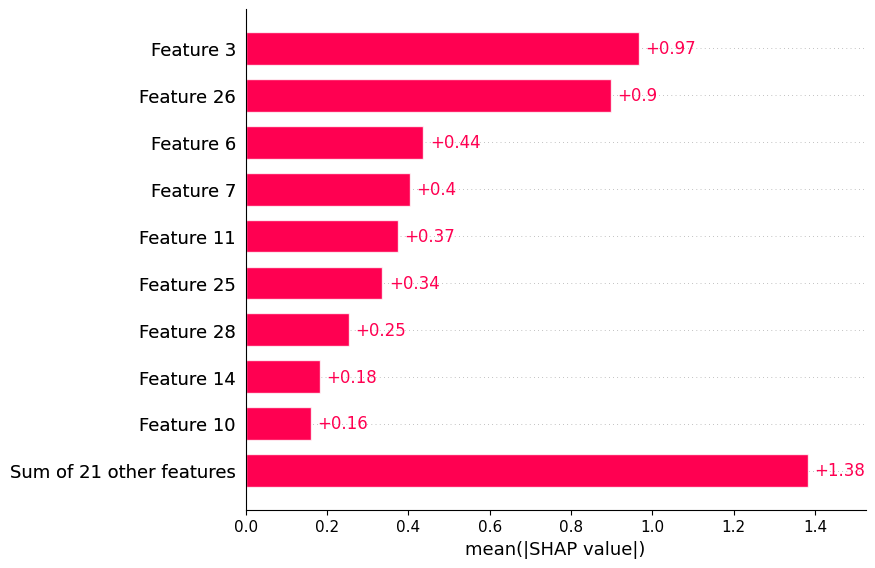

In [135]:
shap.plots.bar(shap_values)


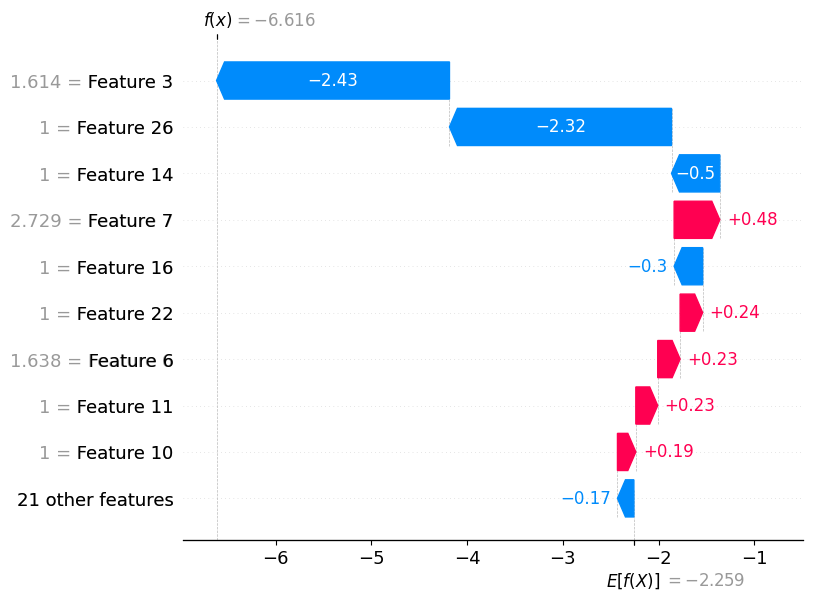

In [136]:
shap.plots.waterfall(shap_values[0])


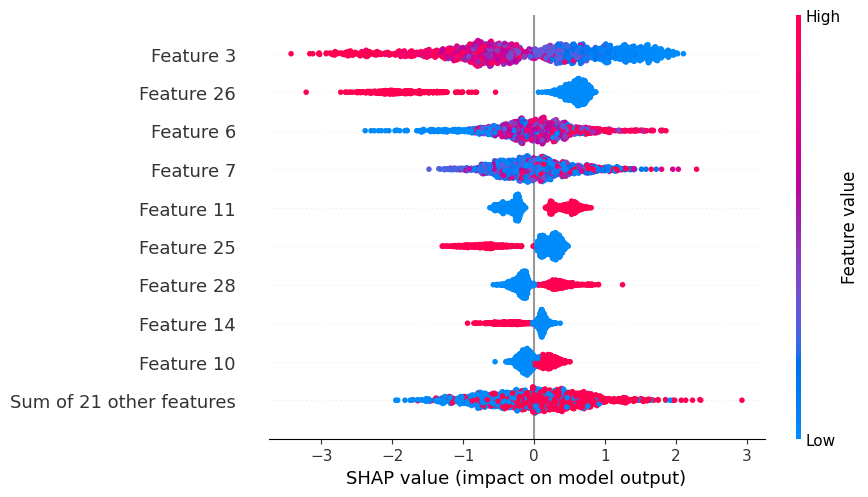

In [137]:
shap.plots.beeswarm(shap_values)


**Customer Segmentation using Clustering (KMeans)**



```
Select Features for Segmentation
```



In [138]:
segmentation_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_seg = scaler.fit_transform(df[segmentation_features])




```
Find Optimal Number of Clusters (Elbow Method)
```



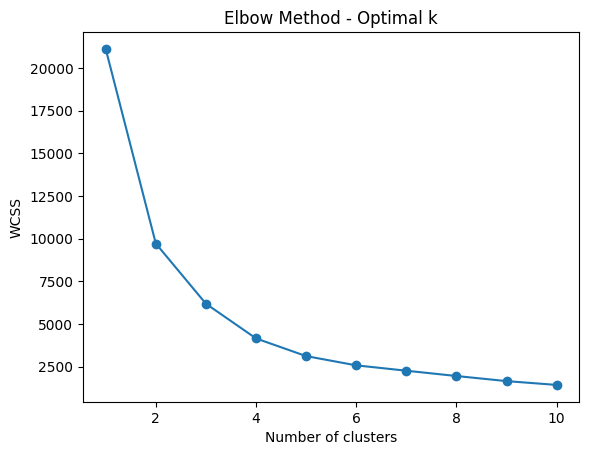

In [140]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

segmentation_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_seg = scaler.fit_transform(df[segmentation_features])

# Impute missing values before fitting KMeans
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean
X_seg = imputer.fit_transform(X_seg) # Fit and transform on X_seg

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_seg)  # Now fitting on imputed data
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal k')
plt.show()



```
Apply KMeans with Optimal k
```



In [141]:
# Let’s say k=4 (update based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_seg)




```
Analyze Segments
```



In [142]:
# Segment-wise churn rate
segment_churn = df.groupby('Segment')['Churn'].value_counts(normalize=True).unstack()
print(segment_churn)

# Optional: average metrics by segment
df.groupby('Segment')[segmentation_features].mean()


Churn           0         1
Segment                    
0        0.949827  0.050173
1        0.846477  0.153523
2        0.753086  0.246914
3        0.518827  0.481173


,tenure,MonthlyCharges,TotalCharges
Segment,,,
0,53.584775,34.759213,1829.351644
1,59.569401,93.293691,5551.335936
2,10.206937,31.768254,303.355018
3,15.491681,80.758560,1258.295548




```
 Visualize Clusters

```



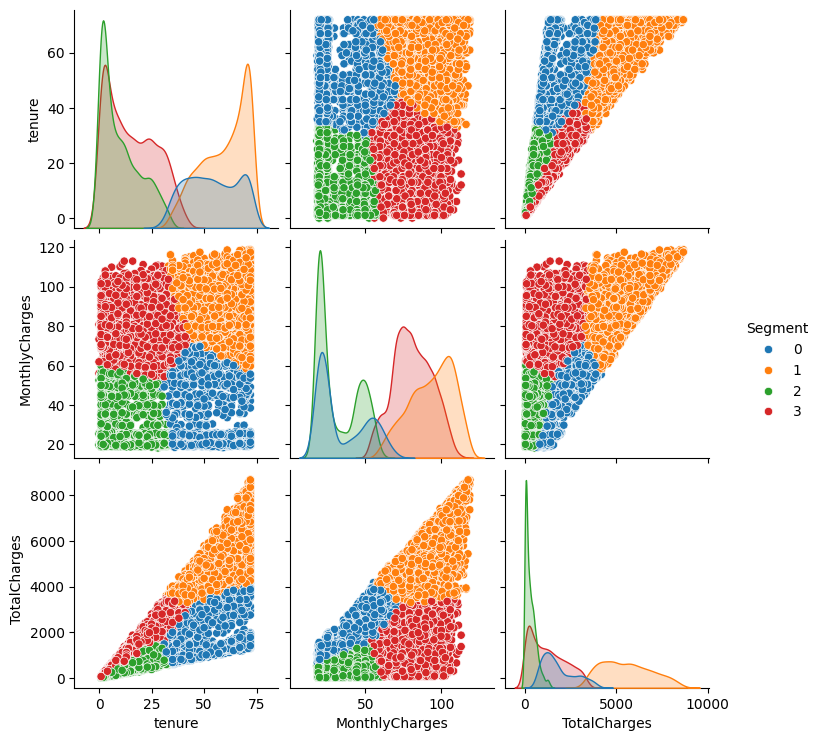

In [143]:
import seaborn as sns
sns.pairplot(df, vars=segmentation_features, hue='Segment', palette='tab10')


In [145]:

from google.colab import files
df_encoded.to_csv('telecom_churn_processed.csv', index=False)
files.download('telecom_churn_processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>